In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,matthews_corrcoef




In [5]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
df['Age'].value_counts()

Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
df['Diabetes_binary'] = df['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)

In [9]:
df['Diabetes_binary'].value_counts(normalize=True)

Diabetes_binary
0    0.842412
1    0.157588
Name: proportion, dtype: float64

In [10]:
X = df.drop(columns=["Diabetes_012", "Diabetes_binary"])
y = df["Diabetes_binary"]

In [11]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Output shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels distribution:\n", y_train.value_counts(normalize=True))
print("Test labels distribution:\n", y_test.value_counts(normalize=True))

Training features shape: (202944, 21)
Test features shape: (50736, 21)
Training labels distribution:
 Diabetes_binary
0    0.84241
1    0.15759
Name: proportion, dtype: float64
Test labels distribution:
 Diabetes_binary
0    0.84242
1    0.15758
Name: proportion, dtype: float64


In [ ]:
# svm_model = SVC(random_state=42)

# param_grid_svm = {
#     'C': [0.1, 1],
#     'gamma': ['scale', 0.01],
#     'tol': [0.001],
#     'class_weight': ['balanced'],
#     'kernel': ['rbf']
# }

# # Using GridSearchCV to find the best hyperparameters (with weather data)
# grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search_svm.fit(X_train, y_train)

# # Best parameters from GridSearch
# best_params = grid_search_svm.best_params_

best_params = {'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf', 'tol': 0.01}

# Building the SVM model with the best parameters
model_svm = SVC(**best_params,probability= True, random_state=42)
model_svm.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_svm.predict(X_test)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'Diabetes'], yticklabels=['No diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

KeyboardInterrupt: 

In [24]:
cm

array([[ 96,  69],
       [ 75, 106]], dtype=int64)

In [25]:
# Reload original input file to get gameId
features_df = pd.read_csv('../Feature_Engineering/NHL_Final_scaled_features_v1.csv')

# Extract gameIds from test set
test_df = features_df[features_df['season'] >= 2020].reset_index(drop=True)

# Combine gameId, actual result, and prediction into a single DataFrame
result_df = pd.DataFrame({
    "gameId": test_df["gameId"].values,
    "SVM_pred": y_pred,
    "SVM_actual": y_test.values
})

# Save to CSV
result_df.to_csv("3.NHL_SVM_pred_actual_with_gameID.csv", index=False)

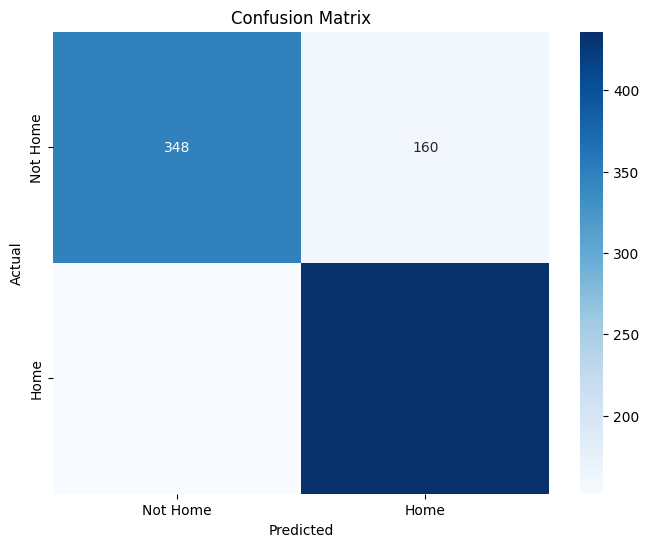

{'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf', 'tol': 0.01}
MCC: 0.42703949922791906
accuracy: 0.7153284671532847
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       508
           1       0.73      0.74      0.74       588

    accuracy                           0.72      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.72      0.72      0.72      1096



In [ ]:
# Predicting on the train data
y_train_pred = model_svm.predict(X_train)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
classification_report_output = classification_report(y_train, y_train_pred)

cm = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

### Model without Weather Data:

In [9]:
# Splitting into features and target variable
X_train = train_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam','Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 
                                   'WeatherCode_Clear', 'WeatherCode_Clouds', 'WeatherCode_Drizzle', 'WeatherCode_Fog', 'WeatherCode_Haze', 'WeatherCode_Mist', 'WeatherCode_Rain', 'WeatherCode_Snow'])
y_train = train_data['FTR']
X_test = test_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam','Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 
                                   'WeatherCode_Clear', 'WeatherCode_Clouds', 'WeatherCode_Drizzle', 'WeatherCode_Fog', 'WeatherCode_Haze', 'WeatherCode_Mist', 'WeatherCode_Rain', 'WeatherCode_Snow'])
y_test = test_data['FTR']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

KeyError: "['FTR', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 'WeatherCode_Clear', 'WeatherCode_Clouds', 'WeatherCode_Drizzle', 'WeatherCode_Fog', 'WeatherCode_Haze', 'WeatherCode_Mist', 'WeatherCode_Rain', 'WeatherCode_Snow'] not found in axis"

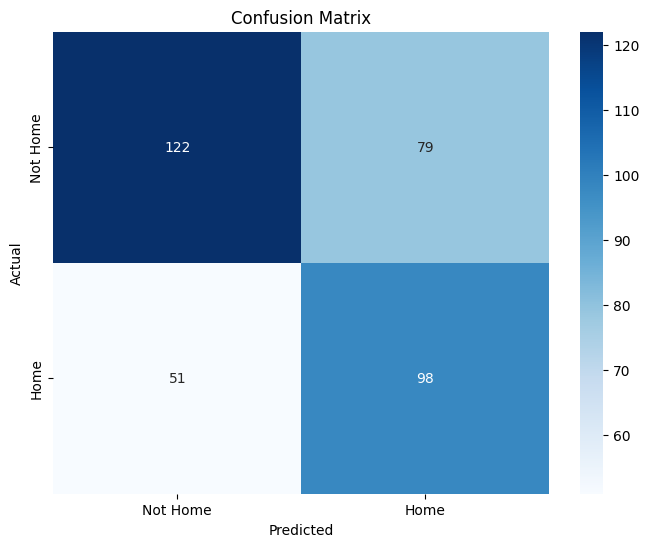

{'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.0001}
MCC: 0.26176285002353916
accuracy: 0.6285714285714286
              precision    recall  f1-score   support

           0       0.71      0.61      0.65       201
           1       0.55      0.66      0.60       149

    accuracy                           0.63       350
   macro avg       0.63      0.63      0.63       350
weighted avg       0.64      0.63      0.63       350



In [15]:
svm_model = SVC(random_state=42)

# Define the parameter grid for GridSearchCV
# param_grid_svm = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['rbf'],
#     'gamma': ['scale', 'auto'],
#     'class_weight':['balanced'], 
#     'tol':[0.0001, 0.01]
# }

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['rbf'],  # Can add 'linear' or 'poly' for comparison
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced'],
    'tol': [0.0001, 0.001, 0.01]
}

# Using GridSearchCV to find the best hyperparameters (with weather data)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best parameters from GridSearch
best_params = grid_search_svm.best_params_

# Building the SVM model with the best parameters
model_svm = SVC(**best_params, random_state=42)
model_svm.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_svm.predict(X_test)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

In [16]:
pd.DataFrame(y_pred,columns=['SVM_y_pred']).to_csv('3.SVM_y_pred_without_weather.csv')

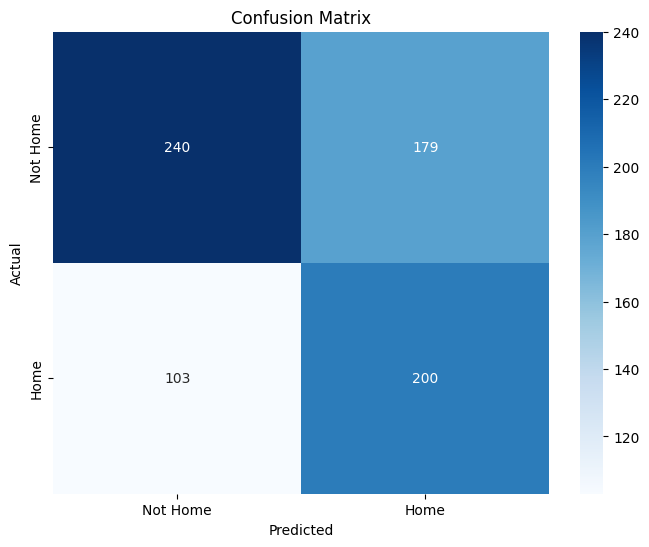

{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf', 'tol': 0.0001}
MCC: 0.23011954817308006
accuracy: 0.6094182825484764
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       419
           1       0.53      0.66      0.59       303

    accuracy                           0.61       722
   macro avg       0.61      0.62      0.61       722
weighted avg       0.63      0.61      0.61       722



In [8]:
# Predicting on the train data
y_train_pred = model_svm.predict(X_train)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
classification_report_output = classification_report(y_train, y_train_pred)

cm = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)